In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100

In [3]:
np.random.seed(42)
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)


In [4]:
from sklearn.preprocessing import add_dummy_feature

X_new = add_dummy_feature(X)

# Linear Regression using Normal Equation

In [5]:
weights = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y
pred = X_new @ weights
mse = 1/m * np.sum(np.square(pred - y))
weights

array([[4.21509616],
       [2.77011339]])

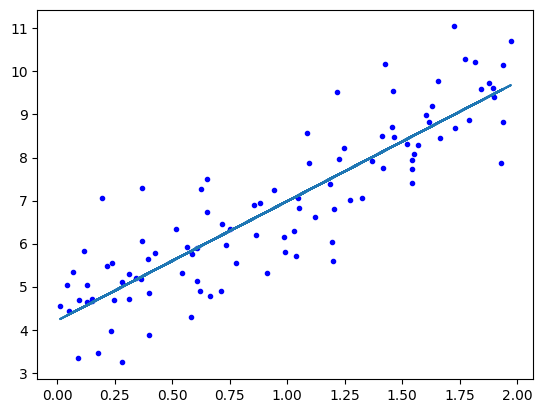

In [6]:
plt.plot(X, y, 'b.')
plt.plot(X, pred)

# Linear Regression using Scikit Learn

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

The LinearRegression class is based on the scipy.linalg.lstsq()
function (the name stands for “least squares”)

In [8]:
theta, residuals, rank, s = np.linalg.lstsq(X_new, y, rcond=1e-6)

This function computes θ= X+y, where X+ is the pseudoinverse of X (specifically, the Moore–Penrose inverse).You can use np.linalg.pinv() to compute the pseudoinverse directly. <br><br>
The pseudoinverse itself is computed using a standard matrix factorization technique called singular value decomposition (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices U Σ V⊺ (see numpy.linalg.svd()).

In [9]:
np.linalg.pinv(X_new) @ y

array([[4.21509616],
       [2.77011339]])

# Linear Regression using Batch Gradient Descent

In [10]:
eta = 0.1        # learning rate
n_epochs = 1000  # training rounds

np.random.seed(42)
weights = np.random.randn(2,1)

for n in range(n_epochs):
    gradients = 2/m * X_new.T @ (X_new @ weights - y)
    weights = weights - eta * gradients

In [11]:
weights

array([[4.21509616],
       [2.77011339]])

# Linear Regressions using Stochastic Gradient Descent

In [12]:
n_epochs = 50
t0, t1 = 5, 50

weights = np.random.randn(2,1)

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for iteration in range (m):
        random_num = np.random.randint(m)
        xi = X_new[random_num:random_num+1]
        yi = y[random_num:random_num+1]
        gradients = 2 * xi.T @ (xi @ weights - yi)
        eta = learning_schedule(epoch * m + iteration)
        weights = weights - eta * gradients

weights

array([[4.20742938],
       [2.74264448]])

You can try to shuffle the dataset before each epoch so that training instances are independant and identically distributed.

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(max_iter= 1000, tol= 1e-5, penalty=None, eta0 = 0.01, 
                             n_iter_no_change= 100, random_state=42)
sgd_regressor.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [14]:
sgd_regressor.coef_, sgd_regressor.intercept_

(array([2.77270267]), array([4.21278812]))

Some estimators also have a partial_fit() method that you can call to run a single round of training on one or more instances (it ignores hyperparameters like max_iter or tol). Repeatedly calling partial_fit() will gradually train the model.<br><br>
Other models have a warm_start hyperparameter instead (and some have both): if you set warm_start=True, calling the fit() method on a trained model will not reset the model; it will just continue training where it left off, respecting hyperparameters like max_iter and tol.

# Mini-batch Gradient Descent

Instead of computing the gradients based on the full training set (as in batch GD) or based on just one instance (as in stochastic GD), mini-batch GD computes the gradients on small random sets of instances called mini-batches. This process is less random but it may be harder for it to escape from local minima.

# Polynomial Regression

What  if  your  data  is  more  complex  than  a  straight  line?  Surprisingly,  you  can  use  a
linear  model  to  fit  nonlinear  data.  A  simple  way  to  do  this  is  to  add  powers  of  each
feature as new features, then train a linear model on this extended set of features. This
technique is called polynomial regression.


In [15]:
np.random.seed(42)

m = 100

X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print("Original feature:       ", X[0], "\nAdding squared feature: ", X_poly[0])

Original feature:        [-0.75275929] 
Adding squared feature:  [-0.75275929  0.56664654]


In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.93366893, 0.56456263]]), array([1.78134581]))

##### The original  function is y = 0.50x<sub>1</sub><sup>2</sup> + 1.00x<sub>1</sub> + 2.00 + gaussian noise
##### The estimated function is y = 0.56x<sub>1</sub><sup>2</sup> + 0.93x<sub>1</sub> + 1.78

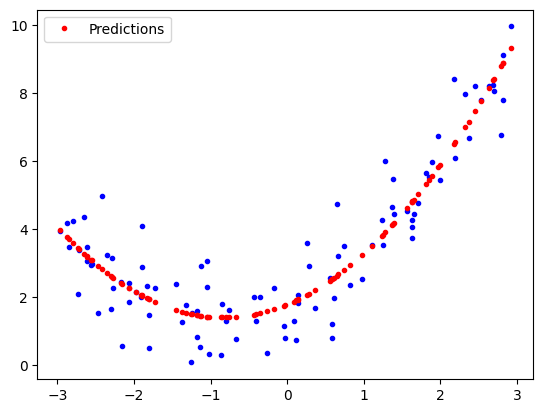

In [18]:
plt.plot(X, y, 'b.')
plt.plot(X, lin_reg.predict(X_poly), 'r.', label='Predictions')
plt.legend()

### Analyzing data with learning curves

In [19]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, 
                                                         train_sizes=np.linspace(0.01, 1, 40), cv = 5, 
                                                         scoring='neg_root_mean_squared_error')

In [20]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

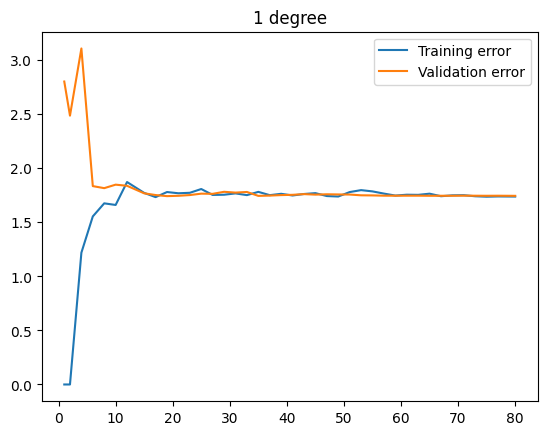

In [21]:
plt.plot(train_sizes, train_errors, label= 'Training error')
plt.plot(train_sizes, valid_errors, label= 'Validation error')
plt.title('1 degree')
plt.legend()

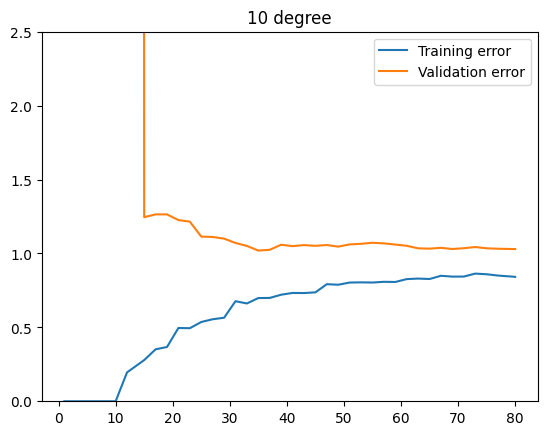

In [22]:
from sklearn.pipeline import make_pipeline

poly_pipe = make_pipeline(PolynomialFeatures(degree=10, include_bias=False),
                          LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(poly_pipe, X, y, train_sizes=np.linspace(0.01, 1, 40),
                                                         cv = 5, scoring = 'neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, label= 'Training error')
plt.plot(train_sizes, valid_errors, label= 'Validation error')
plt.title('10 degree')
plt.ylim((0,2.5))
plt.legend()

### Bias-Variance tradeoff

A high bias model will likely underfit the data. A high variance model with overfit the training data.

# Regularization

Regularization helps to remove overfitting of data.

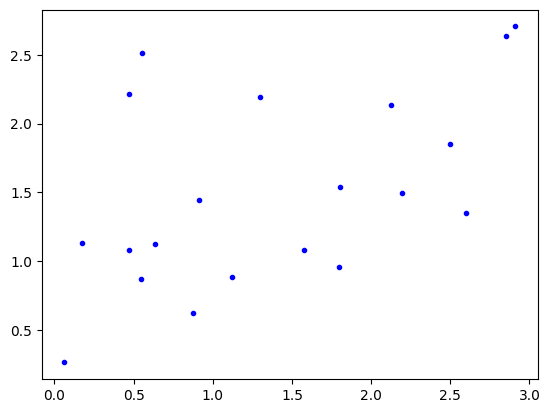

In [23]:
np.random.seed(42)

m = 20

X = np.random.rand(m,1) * 3
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

plt.plot(X, y, 'b.')

### Performing ridge regression using closed form (Normal Form) 

The regularization term is equal to α(∥w∥<sup>2</sup>)<sub>2</sub> / m, where ∥ w ∥<sub> 2</sub> represents the ℓ<sub>2</sub> norm of the weight vector. For batch gradient descent, just add 2αw / m to the part of the MSE gradient vector that corresponds to the feature weights, without adding anything to the gradient of the bias term.

In [24]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.coef_, ridge_reg.intercept_

(array([[0.3828496]]), array([0.97898394]))

### Performing ridge regression using stochastic gradient descent

Specifying "l2"  indicates  that  you  want  SGD  to  add  a  regularization  term  to  the  MSE  cost
function equal to alpha times the square of the ℓ2 norm of the weight vector. This is
just  like  ridge  regression,  except  there’s  no  division  by  m  in  this  case;  that’s  why  we
passed alpha=0.1 / m, to get the same result as Ridge(alpha=0.1).

In [25]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1/m,
                       tol=None, max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y.ravel())

sgd_reg.coef_, sgd_reg.intercept_

(array([0.38468317]), array([0.97600138]))

### Performing lasso regularization using closed form (Normal Form)

The regularization term is equal to l<sub>1</sub> norm of weight vector (i.e. l1 norm is the absolute value of each weight) multiplied by 2 * a. This function is not differentiable at θ<sub>i</sub>  =  0. Hence, we will be using subgradienct vector. The regularized part of the gradient descent included 2 * a multiplied by a vector with values corresponding to the sign of the weights present.

In [26]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.coef_, lasso_reg.intercept_

(array([0.26167212]), array([1.14537356]))

### Performing lasso regularization using stochastic gradient descent

Use SGDRegressor(penalty="l1", alpha=0.1).

### Elastic Net Regression

Elastic  net  regression  is  a  middle  ground  between  ridge  regression  and  lasso  regres‐
sion.  The  regularization  term  is  a  weighted  sum  of  both  ridge  and  lasso’s  regulariza‐
tion terms, and you can control the mix ratio r. When r = 0, elastic net is equivalent
to  ridge  regression,  and  when  r  =  1,  it  is  equivalent  to  lasso  regression

### Early Stopping

A basic implementation is to set aside the train and valid data and then partially fit the train data in each epoch with .partial_fit(). After that you get the predictions for valid data and measure the mean_squared_error on valid data and valid prediction. For the complete training, you measure which model performed the best and had the lowest mean_squared_error() and save it. At the end, you have the model which scored the lowest and tadaa!

# Logistic Regression

In [27]:
from sklearn.datasets import load_iris

In [30]:
iris = load_iris(as_frame=True)

In [44]:
print(iris.data.head(3))
print(iris.target.head(3))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
0    0
1    0
2    0
Name: target, dtype: int64


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

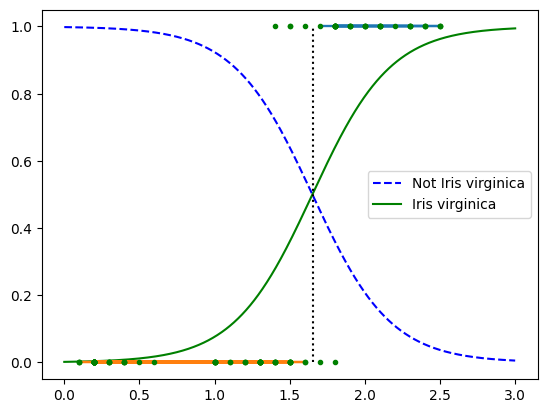

In [137]:
X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris virginica')
plt.plot(X_new, y_proba[:,1], 'g', label = 'Iris virginica')
plt.legend()

decision_boundary = X_new[y_proba[:,1] >= 0.5][0,0]

plt.plot([decision_boundary, decision_boundary],[0,1], 'k:')

proba_pred = log_reg.predict_proba(X_train)
plt.plot(X_train[proba_pred[:,1] >= 0.5], np.ones(np.size(X_train[proba_pred[:,1] >= 0.5])))
plt.plot(X_train[proba_pred[:,1] < 0.5], np.zeros(np.size(X_train[proba_pred[:,1] <  0.5])))
plt.plot(X_train[y_train == True], np.ones(np.size(X_train[y_train == True])), 'g.')
plt.plot(X_train[y_train ==False], np.zeros(np.size(X_train[y_train == False])), 'g.')

To regularize the model, we will not use alpha, rather we will be using C which is the inverse of alpha. The greater the value of C, the more regularized the model will be.

# Softmax Regression

Generalization of logistic regression to support multi-class regression.

In [138]:
X = iris.data[['petal length (cm)','petal width (cm)']].values
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C = 30, random_state=42)
softmax_reg.fit(X_train, y_train)

softmax_reg.coef_, softmax_reg.intercept_

(array([[-5.19054877, -2.69235111],
        [ 0.35293881, -2.31798186],
        [ 4.83760996,  5.01033297]]),
 array([ 20.94850781,   6.48539679, -27.4339046 ]))